In [21]:
def old_fib1(n):
    assert n>=0
    return n if n <= 1 else fib1(n-1)+fib1(n-2)

In [ ]:
fib1(80)

In [1]:
cache = {}

In [5]:
def fib2(n):
    assert n>=0
    if n not in cache:
        cache[n] = n if n <= 1 else fib2(n-1)+fib2(n-2)
    return(cache[n])

In [6]:
fib2(8)

21

In [9]:
fib2(800)

69283081864224717136290077681328518273399124385204820718966040597691435587278383112277161967532530675374170857404743017623467220361778016172106855838975759985190398725

# Декоратор memo
Напишем декоратор memo создает локальную переменную cache за тем запоминает результаты вызова
декарируемой функции в cahce.

In [2]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n]=f(n)
        return cache[n]
    return inner

In [3]:
fib1=memo(fib1)

In [4]:
fib1(80)

23416728348467685

# lru_cache тоже самое что декоратор memo

In [2]:
from functools import lru_cache

In [3]:
fib1 = lru_cache(maxsize=None)(fib1)

In [4]:
fib1(80)

23416728348467685

# Итерация вместо рекурсии

In [11]:
def fib3(n):
    assert n >=0
    f0,f1 = 0,1
    for i in range(n-1):
        f0,f1=f1,f0+f1
    return f1

In [13]:
fib3(8000)

3561533204460626739768914905427460387141369539110154082973500638991885819498711815304829246223963373749873423083216889782034228521693267175594214186111978816819236959743284321273097535654614718808050244321699002512466203835566030351092652496815708455980825654877181538741827129421689128991879649533246136168998590044965735035810856774605383628378979290580539135791985063484992877932473487054068899476937399295193905527420792975902913836012199062687063537510151753758100626402591751183925883151617648375005313453493271681248233059858496951790113255897429539560654496639601132039360167542277472498901884679404509894269174519328918160745655327632006736189766801968534195725815421784083495026969542066047758885029695257263330719223956309043195653930347983496830801755572982419821881275569179922973415736010289561700699477021488635509784509168019589640190234350021673802856836365767446249424907273016689053388000785637444921523414602360860001530139933615215383220927084750528293779491002813557093860863839

# Время работы функции

In [14]:
import time 

In [16]:
def timed(f,*args,n_iter=100):
    acc=float('inf')
    for i in range(n_iter):
        t0=time.perf_counter()
        f(*args)
        t1=time.perf_counter()
        acc=min(acc,t1-t0)
    return acc

In [17]:
timed(fib3,800)

6.880000000819564e-05

# Построим график зависисмоти времени работы от аргумета для fib1 и fib3

In [24]:
from matplotlib import pyplot as plt

In [25]:
def compare(fs,args):
    for f in fs:
        plt.plot(args,[timed(f,arg) for arg in args ], label=f.__name__)
    plt.legend()
    plt.grid(True)

In [26]:
fib1=old_fib1

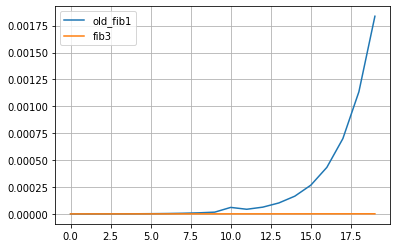

In [27]:
compare([fib1,fib3],list(range(20)))

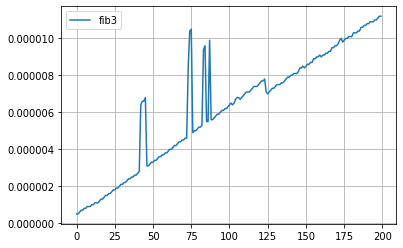

In [29]:
compare([fib3],list(range(200)))